In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as mcolors

import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [294]:
cluster_charicteristics_df = pd.read_csv("../input_csv/cluster_charicteristics_df.csv")
cluster_charicteristics_df2 = cluster_charicteristics_df[['서비스_업종_코드_명', 'cluster', '매출액', '잠재고객', '집객력', '편의성', '경쟁업체']]

service = 'PC방'
group_number = 'group 1'

dataset = cluster_charicteristics_df2[(cluster_charicteristics_df2['서비스_업종_코드_명'] == service) & (cluster_charicteristics_df2['cluster'] == group_number)]

In [295]:
grade_df = dataset.columns.tolist()[2:]
for i in grade_df:
    if dataset.loc[0, i] < 2:
        dataset.loc[0, f'{i}_grade'] = 'D'
    elif dataset.loc[0, i] < 3:
        dataset.loc[0, f'{i}_grade'] = 'C'
    elif dataset.loc[0, i] < 4:
        dataset.loc[0, f'{i}_grade'] = 'B'
    else:
        dataset.loc[0, f'{i}_grade'] = 'A'

chart_df = dataset.drop(columns=['서비스_업종_코드_명', 'cluster', '매출액_grade', '잠재고객_grade', '집객력_grade', '편의성_grade', '경쟁업체_grade']).melt()
chart_df_2 = dataset[['매출액_grade', '잠재고객_grade', '집객력_grade', '편의성_grade', '경쟁업체_grade']].melt()

chart_df['grade'] = chart_df_2['value']

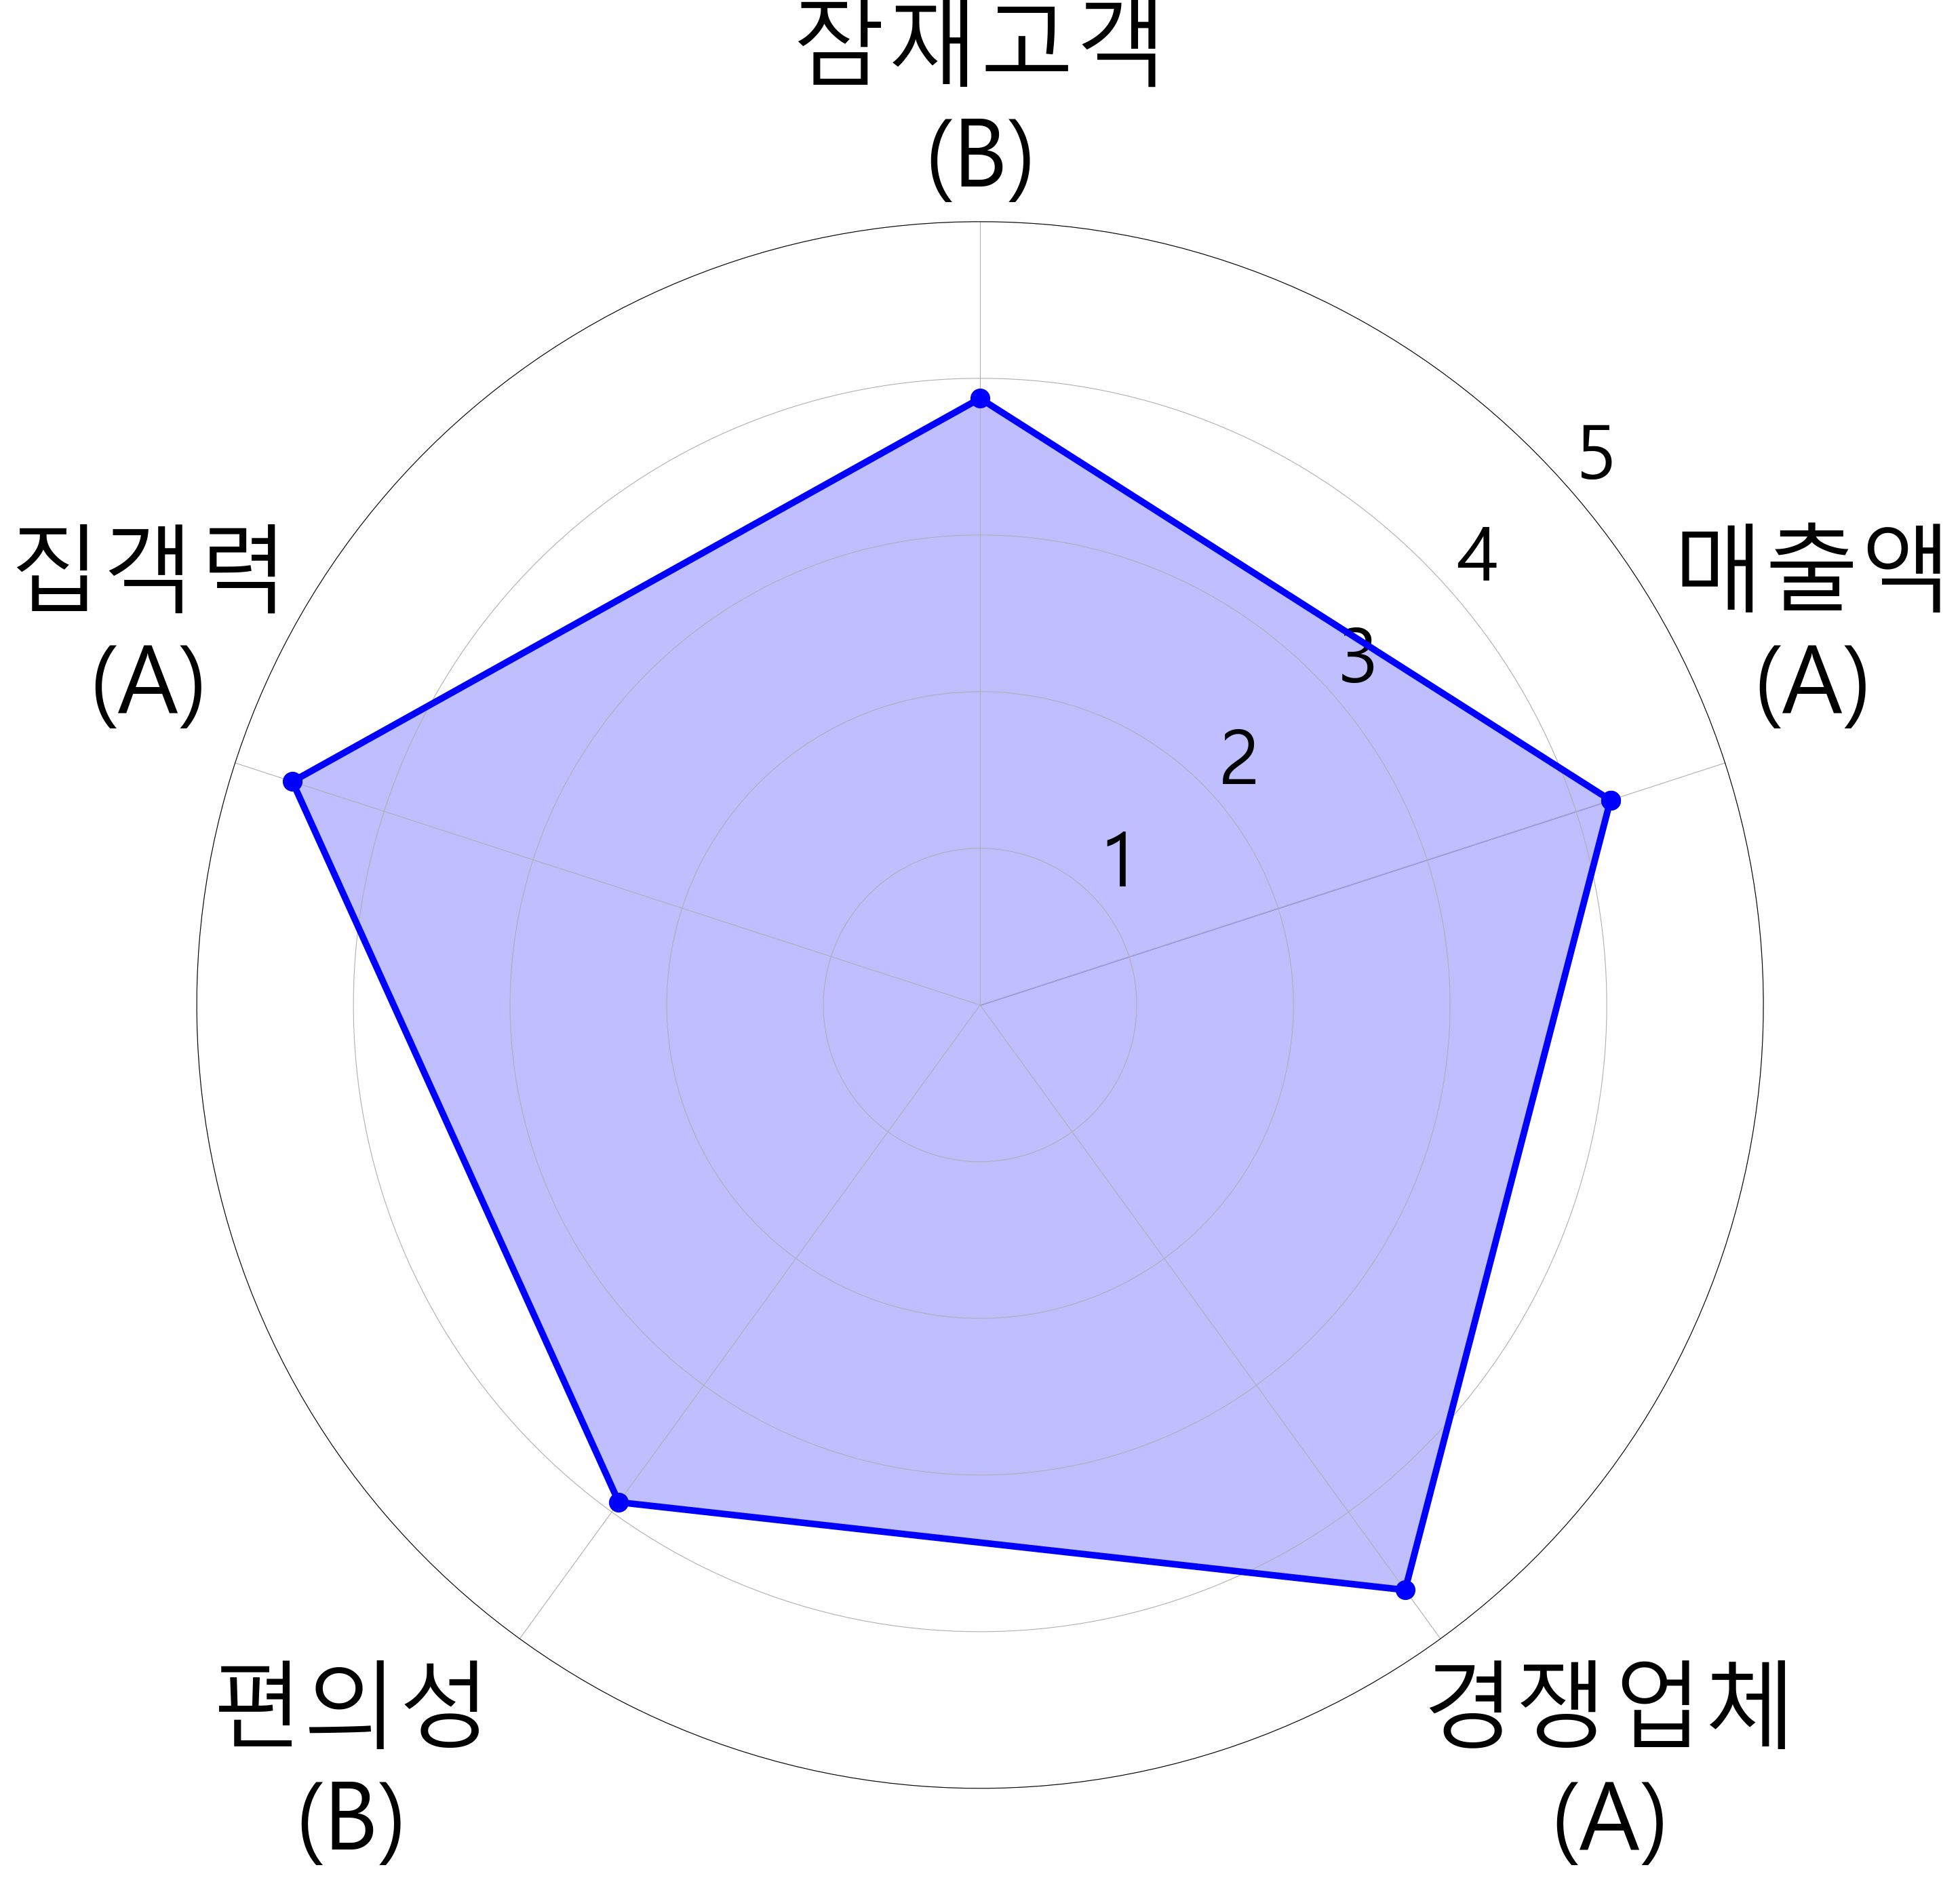

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (32, 30)
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

# 각 변수의 이름과 값을 추출
categories = chart_df['variable'].tolist()
num_categories = len(categories)
values = chart_df['value'].tolist()
values += values[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(32, 30), subplot_kw=dict(polar=True))
ax.fill_between(np.linspace(0, 2 * np.pi, num_categories + 1), values, color='blue', alpha=0.25)
ax.plot(np.linspace(0, 2 * np.pi, num_categories + 1), values, color='blue', linewidth=7, linestyle='solid', marker='o', markersize=20)

# x축 레이블과 등급 추가
ax.set_xticks(np.linspace(0, 2 * np.pi, num_categories, endpoint=False))

# X축 레이블 설정
xtick_labels = [f'{var}\n({grade})' for var, grade in zip(chart_df['variable'], chart_df['grade'])]
for i, label in enumerate(ax.set_xticklabels(xtick_labels, ha='center', va='bottom', rotation=0, fontsize=100)):
    if i == 0:  
        label.set_position((0, -0.1))
    elif i == 1:  
        label.set_position((0, 0))
    elif i == 2:  
        label.set_position((0, -0.1))
    elif i == 3:  
        label.set_position((0, -0.35))
    elif i == 4:  
        label.set_position((0, -0.35))




# y축 레이블 크기 크게 조절
yticks = np.arange(0, 6, 1)
yticklabels = [str(y) if y != 0 else '' for y in yticks]  # 0은 레이블을 숨기기 위해 빈 문자열로 설정
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=80)

# 차트 회전
ax.set_theta_offset(np.radians(18))

plt.show()